## Generate data

In [101]:
import matplotlib.pyplot as plt
import numpy as np

from functools import cache
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams.update(
    {
        "figure.figsize": (8, 6),
        "axes.titlesize": 15,
        "axes.labelsize": 12,
        "legend.fontsize": 12,
        "axes.grid": True,
        "axes.axisbelow": True,
        "pcolor.shading": "auto",
    }
)

In [102]:
N = 5_000  # number of data points
B = [-6, 3]  # two features

In [103]:
def generate_data(n, b, seed=501):
    np.random.seed(seed)
    x = np.random.normal(2, 1, n).reshape((-1, 1))  # feature
    z = b[0] + b[1] * x  # latent variable
    p = 1 / (1 + np.exp(-z))  # probability (of sample being in class 1)
    y = np.random.binomial(1, p=p).flatten()  # sampled class assignment
    return x, y, p

x, y, p = generate_data(N, B)

In [104]:
# create the range of x values we want to look at later
x_predict = np.arange(x.min().round(2), x.max().round(2), 0.005).reshape(-1, 1)

### Plot the generated data

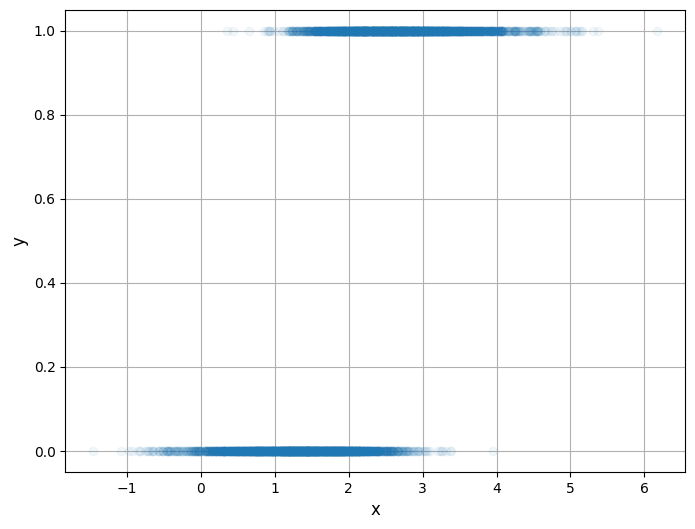

In [105]:
plt.scatter(x, y, alpha=0.05)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Linear Regression

In [106]:
model_linear = LinearRegression()
model_linear.fit(x, y);

In [107]:
def predict_plot(model, x, x_true, y_true, title="", lims=None, proba=False, axis=plt):
    axis.scatter(x_true, y_true, alpha=0.2, label="True")
    axis.plot(x, model.predict(x), label="Predicted", c="darkorange", linewidth=3)
    if proba:
        axis.plot(
            x,
            model.predict_proba(x)[:, 1],
            label="Predicted Probability",
            c="darkgreen",
            linewidth=3,
        )
    if axis==plt:
        axis.xlabel("x")
        axis.ylabel("y")
        axis.legend()
        axis.title(title)
        if lims:
            axis.xlim(lims[0])
            axis.ylim(lims[1])
        axis.show()
    else:
        axis.set(xlabel='x', ylabel='y')
        axis.legend()
        axis.set_title(title)
        if lims:
            axis.set_xlim(lims[0])
            axis.set_ylim(lims[1])

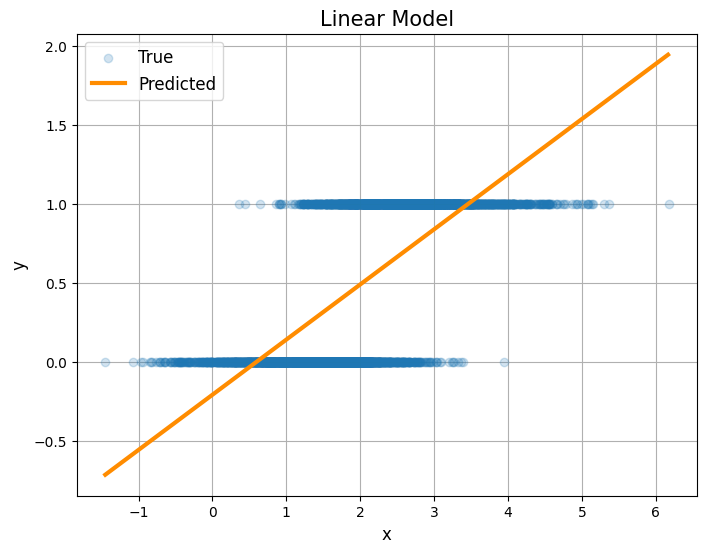

In [108]:
predict_plot(model_linear, x_predict, x, y, "Linear Model")

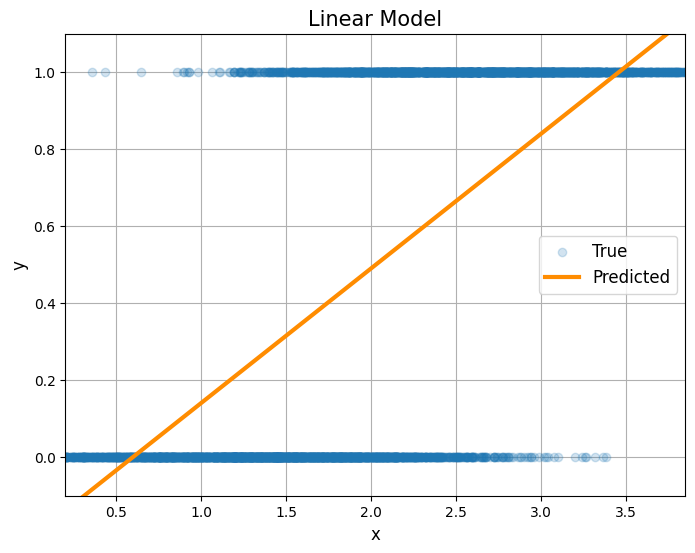

In [109]:
predict_plot(model_linear, x_predict, x, y, "Linear Model", ([0.2, 3.85], [-0.1, 1.1]))

In [110]:
@cache
def get_treshold_value_linear(model, threshold=0.5):
    for i in np.arange(1, 4, 0.001):
        y = model.predict(np.array([[i]]))[0]
        if np.round(y, 3) == threshold:
            return np.round(i, 4)
        
get_treshold_value_linear(model_linear)

2.027

## Logistic Regression

In [111]:
model_logistic = LogisticRegression()
model_logistic.fit(x, y);

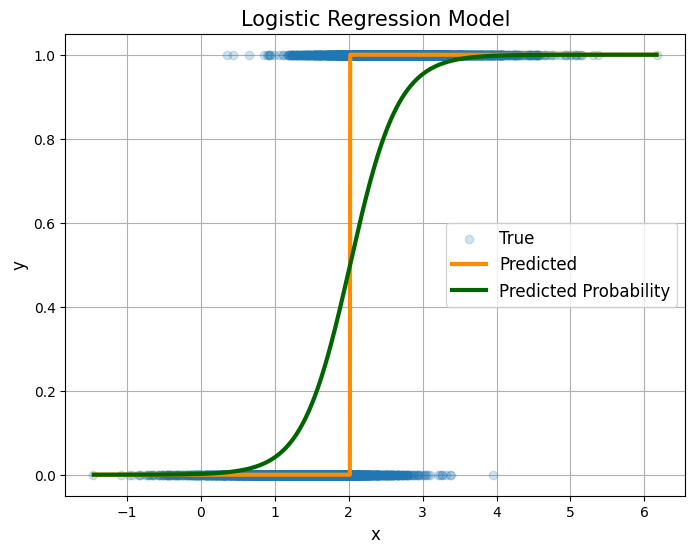

In [112]:
predict_plot(model_logistic, x_predict, x, y, "Logistic Regression Model", proba=True)

In [113]:
@cache
def get_treshold_value_logistic(model, threshold=0.5):
    for i in np.arange(1, 4, 0.001):
        y = model.predict_proba(np.array([[i]]))[:,1]
        if np.round(y, 3) == threshold:
            return np.round(i, 4)
        
get_treshold_value_logistic(model_logistic)

2.018

## Decision Tree

### Max depth 1

In [114]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=1)
model_tree.fit(x, y);

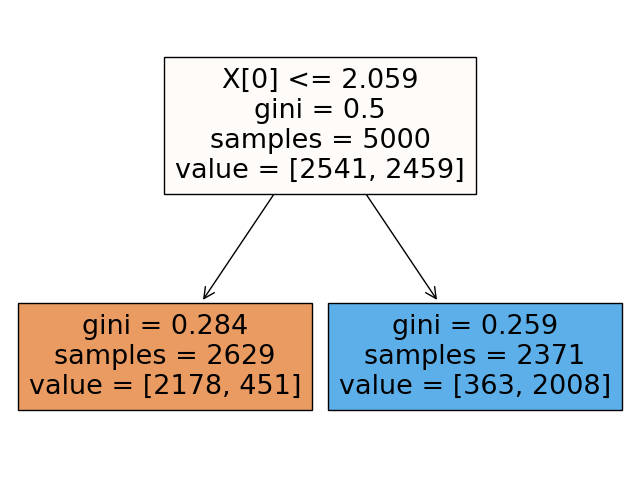

In [115]:
plot_tree(model_tree, filled=True)
plt.show()

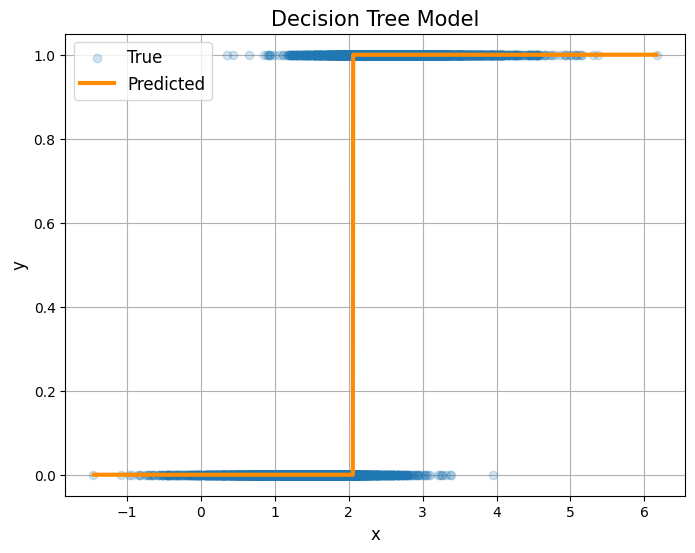

In [116]:
predict_plot(model_tree, x_predict, x, y, "Decision Tree Model")

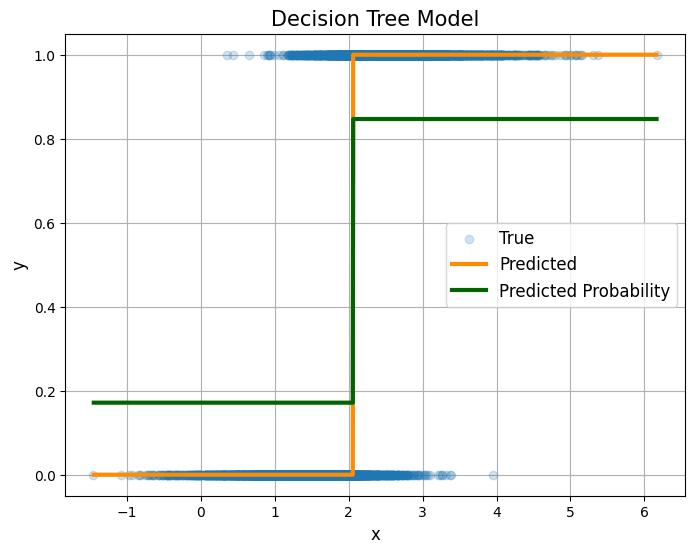

In [117]:
predict_plot(model_tree, x_predict, x, y, "Decision Tree Model", proba=True)

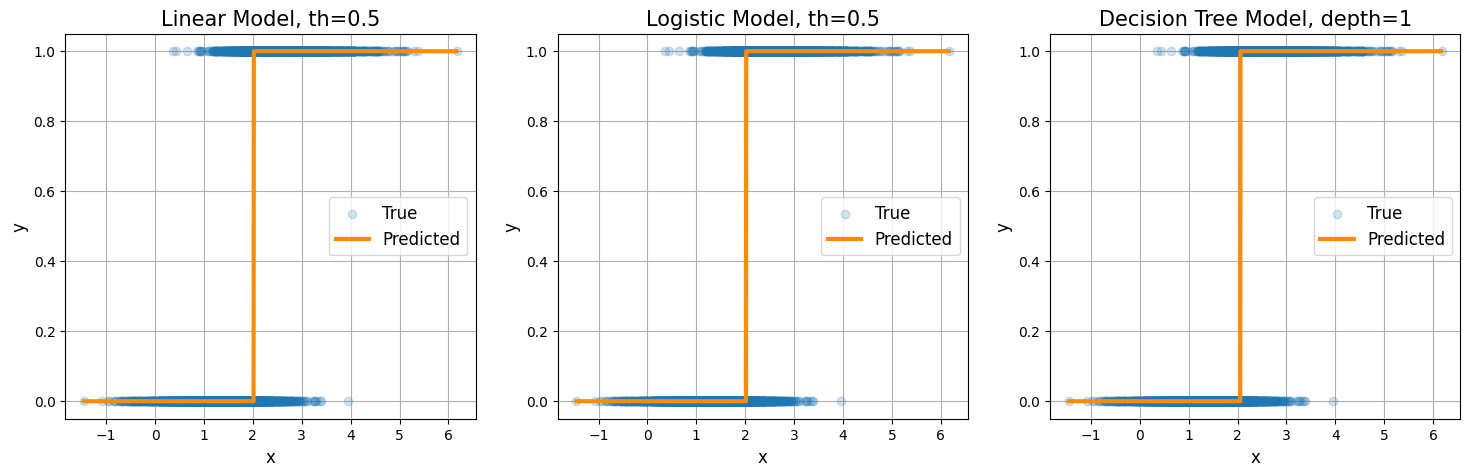

In [124]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
predict_plot(model_logistic, x_predict, x, y, "Linear Model, th=0.5", axis=ax1)
predict_plot(model_logistic, x_predict, x, y, "Logistic Model, th=0.5", axis=ax2)
predict_plot(model_tree, x_predict, x, y, "Decision Tree Model, depth=1", axis=ax3)
plt.show()

### Max depth 3

In [127]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_tree.fit(x, y);

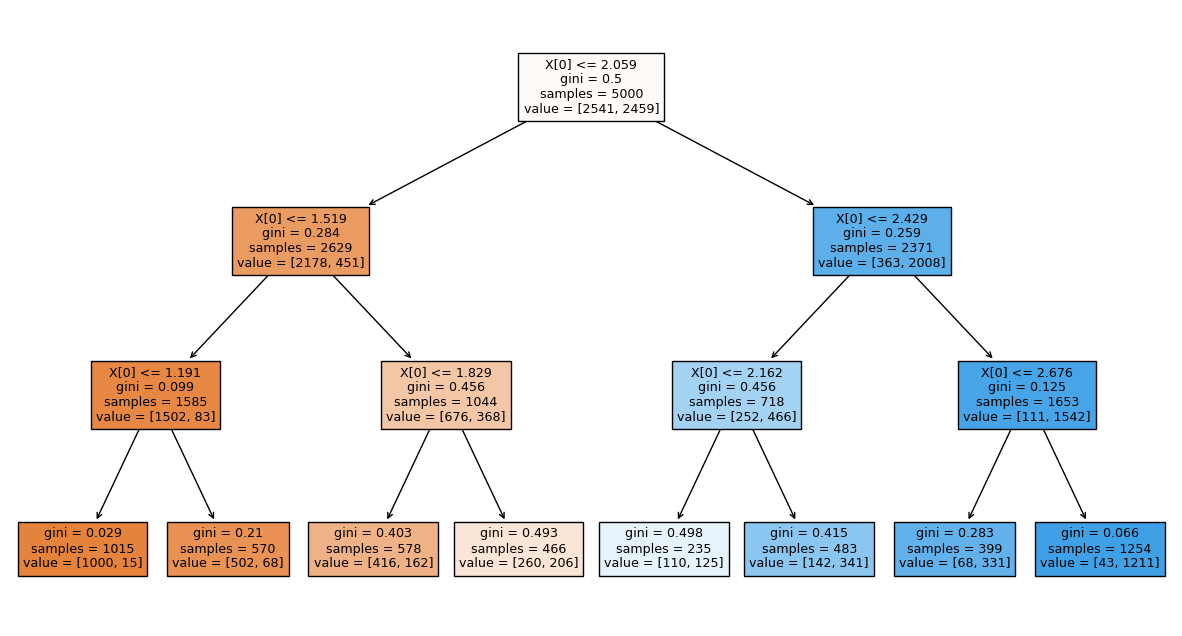

In [128]:
plt.figure(figsize=(15,8))
plot_tree(model_tree, filled=True)
plt.show()

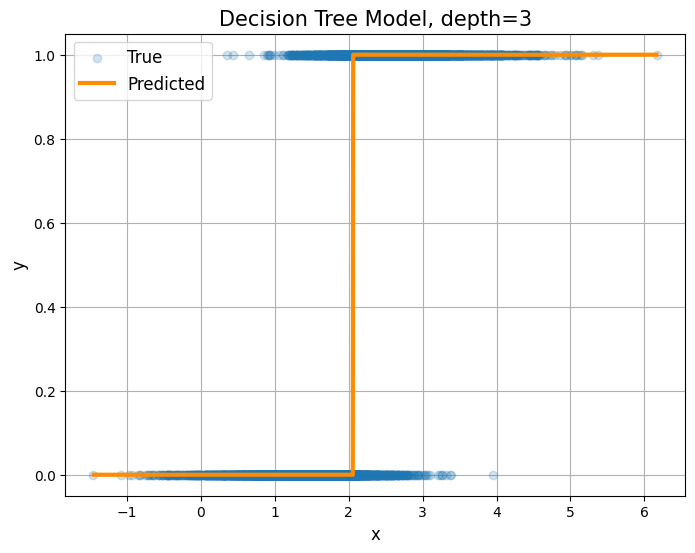

In [129]:
predict_plot(model_tree, x_predict, x, y, "Decision Tree Model, depth=3")

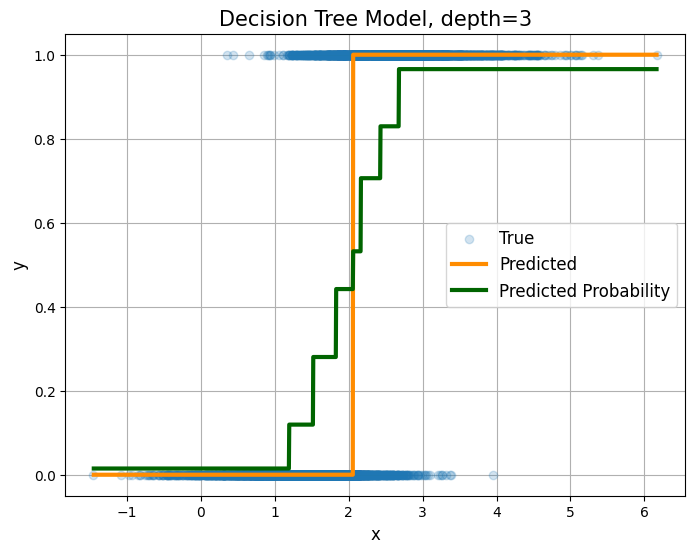

In [130]:
predict_plot(model_tree, x_predict, x, y, "Decision Tree Model, depth=3", proba=True)

### Max depth 4

In [131]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_tree.fit(x, y);

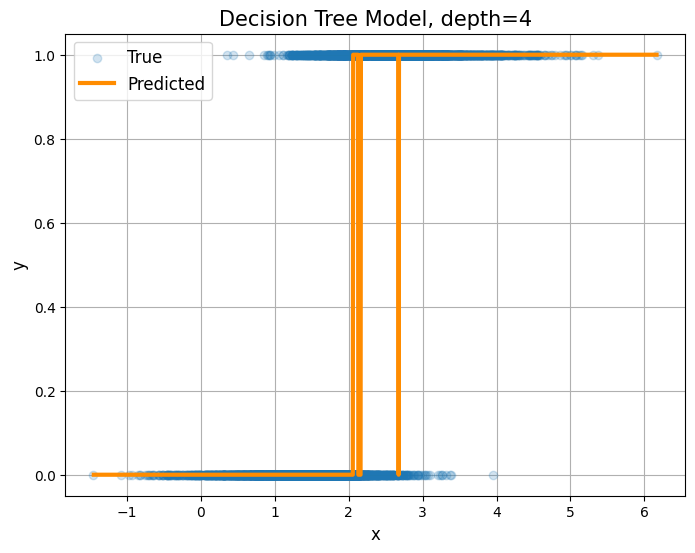

In [132]:
predict_plot(model_tree, x_predict, x, y, "Decision Tree Model, depth=4")

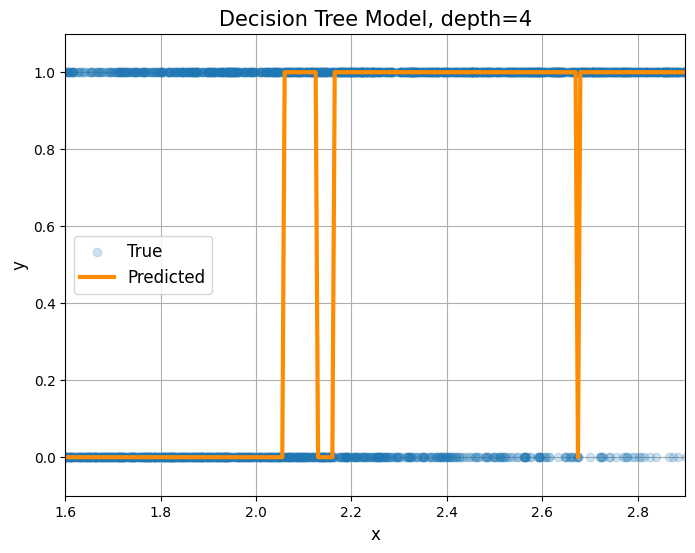

In [137]:
predict_plot(model_tree, x_predict, x, y, "Decision Tree Model, depth=4", ([1.6, 2.9], [-0.1, 1.1]))

## Decision Boundaries Visualized

### Generate data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.ioff();

In [2]:
n = 500
means = [[1, 1], [4, 4]]
X, y = make_blobs(n_samples=n, 
                  centers=means,
                  random_state=888)

In [3]:
precision = 0.001
x_1, x_2 = np.mgrid[-2:8:precision, -2:8:precision]
grid = np.column_stack((x_1.ravel(), x_2.ravel()))

### Linear Regression

In [4]:
linreg = LinearRegression()
linreg.fit(X, y);
output = linreg.predict(grid)

In [5]:
threshold = 0.5
output = (output >= threshold)*1
output = output.reshape(x_1.shape)
output.shape

(10000, 10000)

### Logistic Regression

In [6]:
log = LogisticRegression()
log.fit(X, y);

In [7]:
logit_probs = log.predict(grid).reshape(x_1.shape)
logit_probs.shape

(10000, 10000)

### Decision tree

In [8]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y);

In [9]:
tree_probs = tree.predict(grid).reshape(x_1.shape)
tree_probs.shape

(10000, 10000)

### Plot decision boundaries

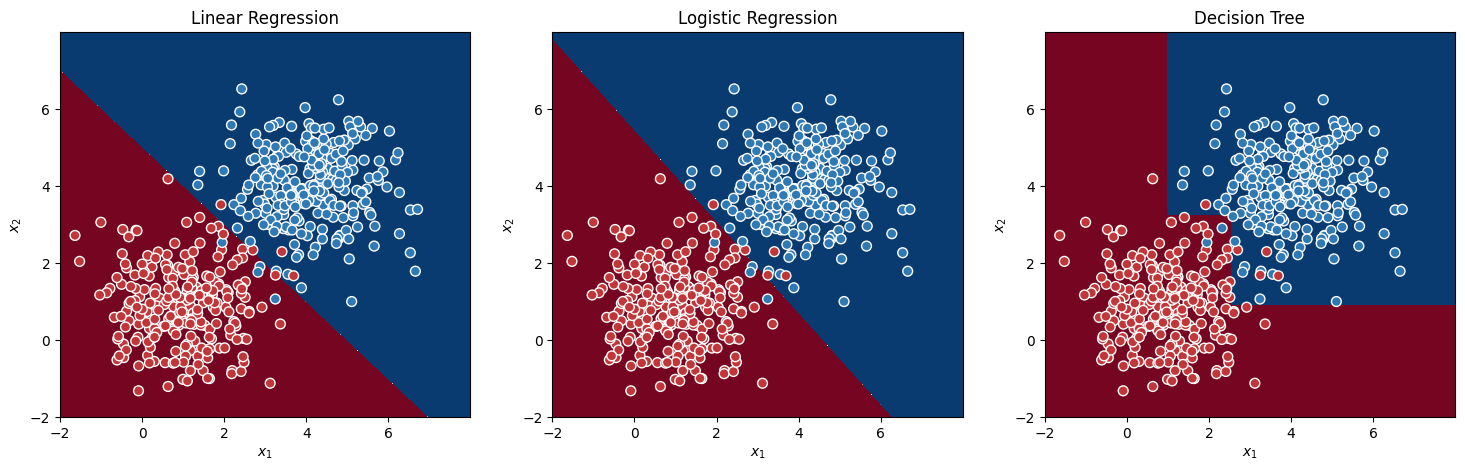

In [10]:
fig, (ax1, ax2, ax) = plt.subplots(1, 3, figsize=(18, 5))

ax1.set_title('Linear Regression')
contour_1 = ax1.contourf(x_1, x_2, output, 25, cmap="RdBu", vmin=0, vmax=1)
ax1.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax1.set(xlabel="$x_1$", ylabel="$x_2$")

ax2.set_title('Logistic Regression')
contour_2 = ax2.contourf(x_1, x_2, logit_probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax2.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax2.set(xlabel="$x_1$", ylabel="$x_2$")

ax.set_title('Decision Tree')
contour_2 = ax.contourf(x_1, x_2, tree_probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax.set(xlabel="$x_1$", ylabel="$x_2$")

plt.show()